In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("data/stud.csv")

df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.shape

(1000, 8)

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:

df.duplicated().sum()

#no duplicates

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:

numeric_feature =[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']



In [17]:
print("Numeric Features: ", numeric_feature)
print("Categorical Features: ", categorical_feature)

Numeric Features:  ['math_score', 'reading_score', 'writing_score']
Categorical Features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [ ]:
### Adding columns roroaL SCORE AND AVAREAGE


In [20]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


readinf_full = df[df['reading_score]==100]['average'].count()

In [26]:
reading_full = df[df['reading_score']==100]['average_score'].count()

writing_full = df[df['writing_score']==100]['average_score'].count()
math_full = df[df['math_score']==100]['average_score'].count()
print(f"Number of students with full reading score: {reading_full}")
print(f"Number of students with full writing score: {writing_full}")
print(f"Number of students with full math score: {math_full}")

Number of students with full reading score: 17
Number of students with full writing score: 14
Number of students with full math score: 7


In [27]:
reading_less_20 = df[df['reading_score']<20]['average_score'].count()
writing_less_20 = df[df['writing_score']<20]['average_score'].count()
math_less_20 = df[df['math_score']<20]['average_score'].count()
print(f"Number of students with less than 20 in reading score: {reading_less_20}")
print(f"Number of students with less than 20 in writing score: {writing_less_20}")
print(f"Number of students with less than 20 in math score: {math_less_20}")


Number of students with less than 20 in reading score: 1
Number of students with less than 20 in writing score: 3
Number of students with less than 20 in math score: 4


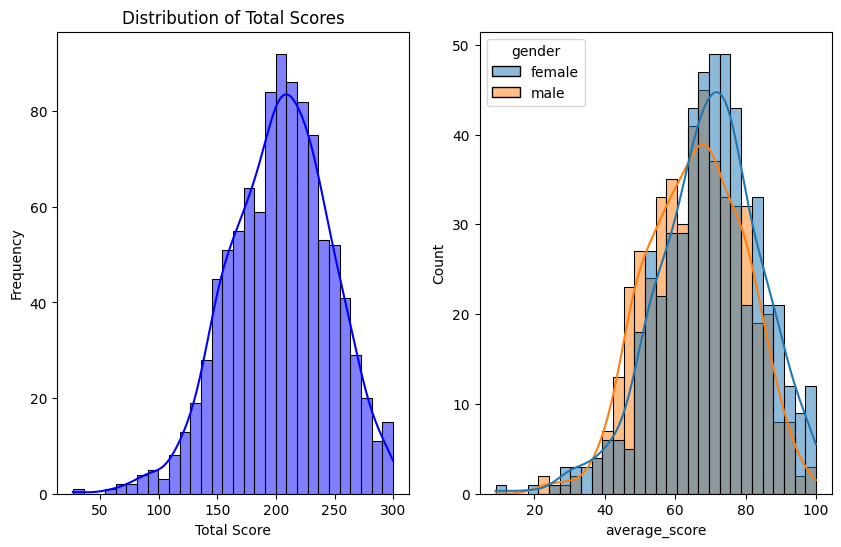

In [29]:
## now we can do visualisation
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['total_score'], bins=30, kde=True, color='blue')
plt.title("Distribution of Total Scores")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)

sns.histplot(data = df , x="average_score", bins=30, kde=True, color='green' , hue="gender")

plt.show()